In [193]:
import pandas as pd
import numpy as np

df = pd.read_csv("desktop/california_housing_train.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [194]:
df.describe(include="all")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [195]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

Нема missing values

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

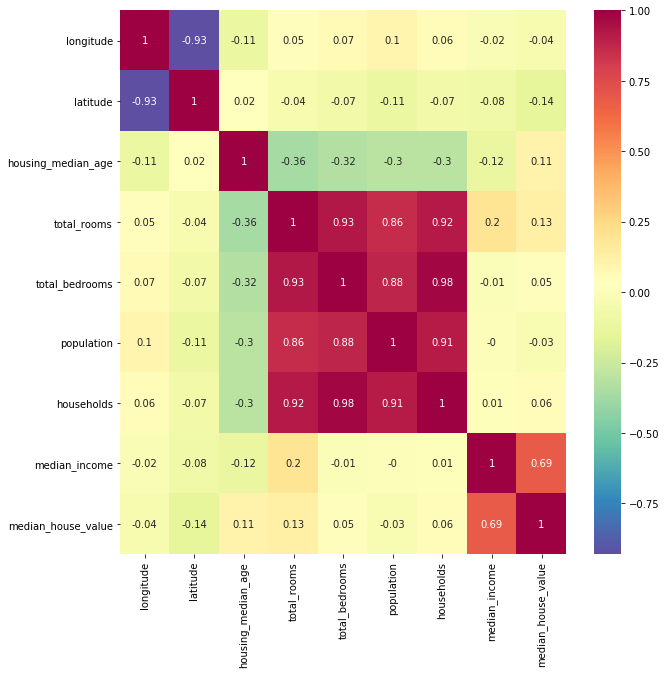

In [197]:
%matplotlib inline 
cormat = df.corr()
cormat = round(cormat,2)
plt.figure(figsize=(10,10))
sns.heatmap(cormat, cmap='Spectral_r', annot=True)

има голема зависност помеѓу total_rooms, total_bedrooms, population, households меѓусебно, но најзначителна променлива за предикција на median_house_value е променливата median_income

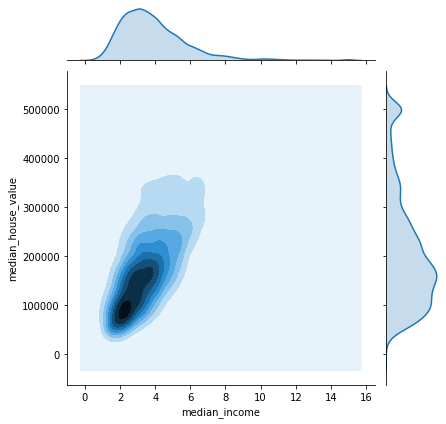

In [198]:
sns.jointplot(data=df, x="median_income", y="median_house_value", kind="kde")

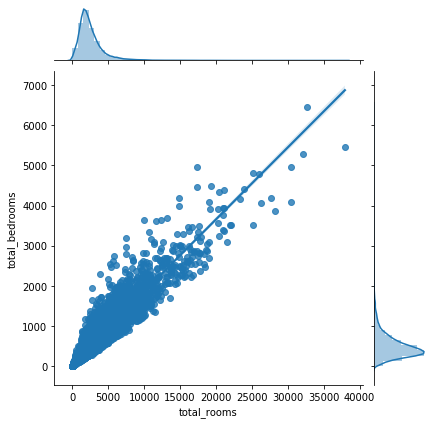

In [199]:
sns.jointplot(data=df, x="total_rooms",y="total_bedrooms", kind="reg")

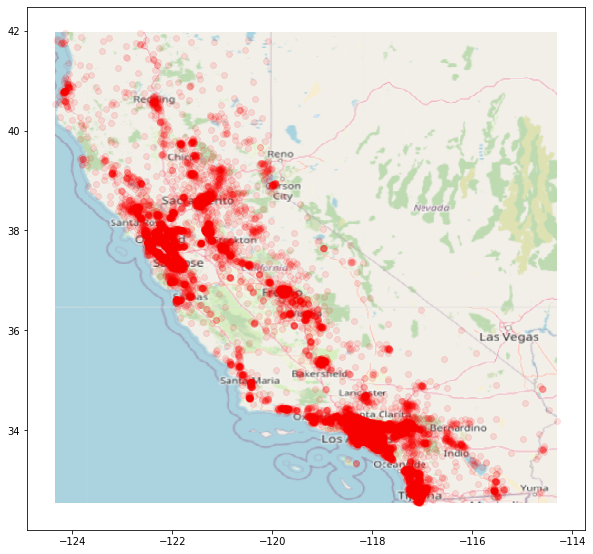

In [200]:
image = plt.imread('desktop/screenshot_4.png')
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image, extent = (-124.35,-114.31,32.54,41.95) )
ax.scatter(df["longitude"],df["latitude"],alpha=0.1, c="r" )

Визуелизација на локациите

# Обична линеарна регресија

In [210]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

dataset = df.copy()
column=list(dataset.columns)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset = pd.DataFrame(dataset)
dataset.columns=column
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,0.107012
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,0.134228
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,0.145775
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,0.120414
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,0.104125
...,...,...,...,...,...,...,...,...,...
16995,0.008964,0.854410,1.000000,0.058389,0.060987,0.025337,0.060516,0.128081,0.198764
16996,0.007968,0.866100,0.686275,0.061869,0.081782,0.033381,0.076303,0.139170,0.131960
16997,0.004980,0.988310,0.313725,0.070515,0.082247,0.034782,0.074823,0.174577,0.182682
16998,0.004980,0.984060,0.352941,0.070384,0.085506,0.036296,0.078441,0.102054,0.145981


In [211]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop(["median_house_value"],axis=1),dataset["median_house_value"],test_size = 0.2, random_state=1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(13600, 8) (3400, 8) (13600,) (3400,)


In [212]:
model = LinearRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

print("Model coefficients: ", model.coef_)
print("Mean Squared Error = " + str(mean_squared_error(y_pred, Y_test)))

Model coefficients:  [-0.90440371 -0.8424374   0.11589519 -0.60069553  1.56202248 -2.71358229
  0.47322904  1.20006764]
Mean Squared Error = 0.019027632634181623


# Ridge регресија

In [213]:
from sklearn.linear_model import Ridge

dataset = df.copy()
column=list(dataset.columns)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset = pd.DataFrame(dataset)
dataset.columns=column

In [214]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop(["median_house_value"],axis=1),dataset["median_house_value"],test_size = 0.2, random_state=5)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(13600, 8) (3400, 8) (13600,) (3400,)


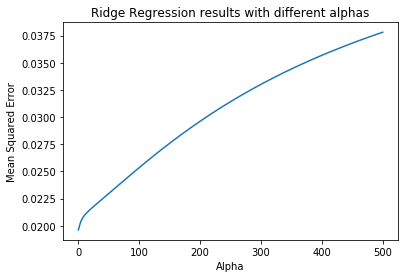

In [215]:
MSE = []
alphas = np.linspace(0, 500.0, num = 1500)
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    MSE.append(mean_squared_error(y_pred, Y_test))

plt.plot(alphas, MSE)
plt.ylabel("Mean Squared Error")
plt.xlabel("Alpha")
plt.title("Ridge Regression results with different alphas")
plt.show()

# Полиномна регресија

In [216]:
from sklearn.preprocessing import PolynomialFeatures

dataset = df.copy()
column=list(dataset.columns)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset = pd.DataFrame(dataset)
dataset.columns=column

X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop(["median_house_value"],axis=1),dataset["median_house_value"],test_size = 0.2, random_state=1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(13600, 8) (3400, 8) (13600,) (3400,)


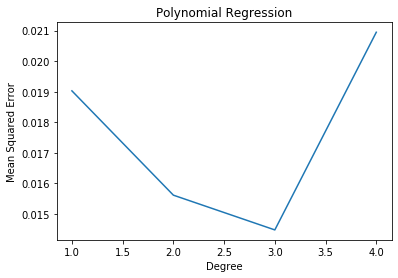

In [217]:
MSE = []
degrees = range(1,5)
for degree in degrees:
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(X_train)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, Y_train)

    y_pred = pol_reg.predict(poly_reg.transform(X_test))
    MSE.append(mean_squared_error(y_pred,Y_test))

plt.plot(degrees, MSE)
plt.ylabel("Mean Squared Error")
plt.xlabel("Degree")
plt.title("Polynomial Regression")
plt.show()